<a href="https://colab.research.google.com/github/yechan9601/python_digital_marketing/blob/main/Ch3_Regression_Analysis_21801073JooYechan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# 1. Loading Data

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [ ]:
df.shape

(9134, 24)

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


response의 값을 0 또는 1로 수치화시켜주기 위해 'Engaged' 열을 dataframe에 추가해준다. 

In [ ]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [ ]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

# 2. Data *Analysis*

Engagement Rate

In [ ]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)

'Engaged'를 그룹별로 나누고 (0 또는 1), 해당 그룹별 개수를 df.shape[0] (행의 개수)로 나눈 데이터프레임. 즉 전체 100에서 response가 0 또는 1인 사람들의 비율. 

In [ ]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [ ]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


response가 없던 사람들은 약 86%, 응답을 한 사람들은 약 14%이다. 

In [ ]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values = 'Response', index = 'Renew Offer Type', columns = 'Engaged', aggfunc = len
).fillna(0.0)

engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']

엑셀의 피벗테이블과 같은 기능이다. 데이터로 사용될 value는 response, 행 위치로 들어갈 열은 'Renew Offer Type', 열 위치로 들어갈 열은 'Engaged'이고, Aggregation Function (집계함수) 는 len (value의 개수) 이다. 

Offer type에 따른 response의 개수를 'Engaged'열 별로 나누어 볼 수 있다. 

[Pandas 기초] https://yganalyst.github.io/data_handling/Pd_14/

In [ ]:
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


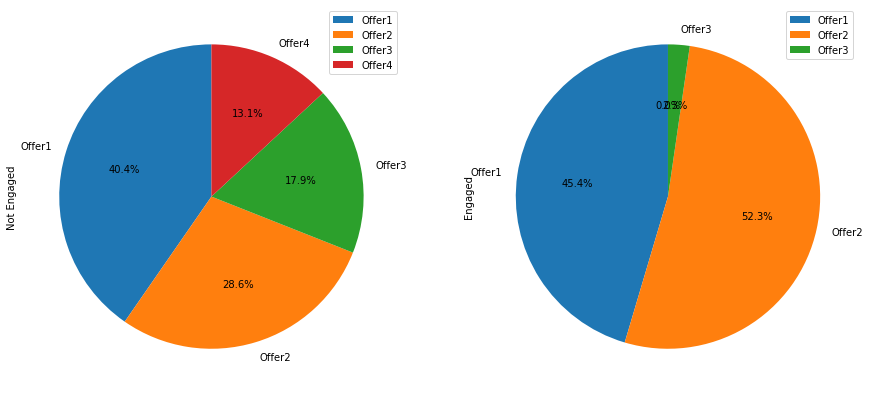

In [ ]:
engagement_by_offer_type_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct = lambda x: '%0.1f%%' % x
)

plt.show()

In [ ]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values = 'Response', index = 'Sales Channel', columns = 'Engaged', aggfunc = len
).fillna(0.0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']

In [ ]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


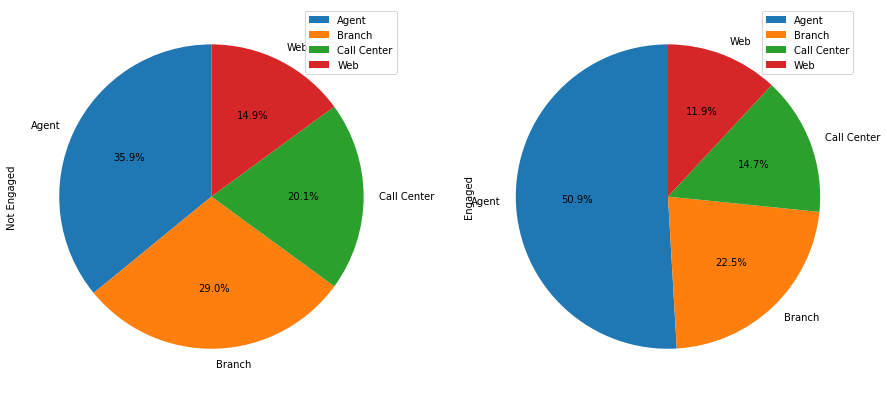

In [ ]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct = lambda x: '%0.1f%%' % x
)

plt.show()

Engaged(응답여부)에 따라 Total Claim Amount의 분포도가 얼마나 다른지 보기위해 boxplot을 사용.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


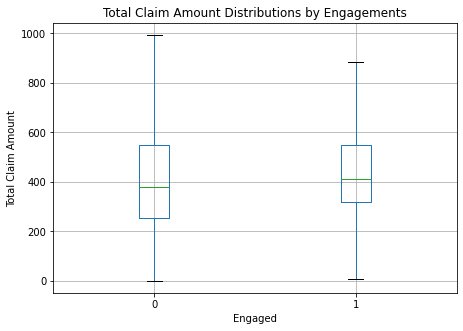

In [ ]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')

plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


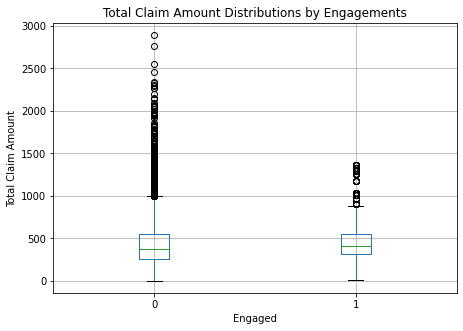

In [ ]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')

plt.suptitle("")
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
ax1 = df[['Engaged', 'Total Claim Amount']]

In [ ]:
ax1

,Engaged,Total Claim Amount
0,0,384.811147
1,0,1131.464935
2,0,566.472247
3,0,529.881344
4,0,138.130879
...,...,...
9129,0,198.234764
9130,1,379.200000
9131,0,790.784983
9132,0,691.200000


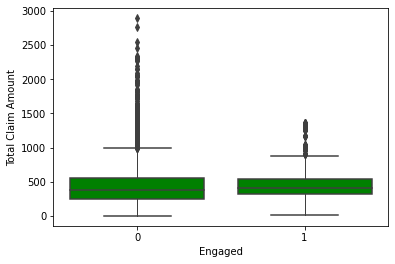

In [ ]:
# plot boxplot
sns.boxplot(
    data=ax1, 
    x='Engaged', 
    y='Total Claim Amount',
    showcaps=True,
    whiskerprops={'linewidth':1},
    showfliers=True,
    boxprops={'facecolor':'Green'}
)

In [ ]:
#plot swarmplot
sns.swarmplot(data=ax1, x="Engaged", y="Total Claim Amount")

#plot boxplot
sns.boxplot(
    data=ax1,
    x="Engaged",
    y="Total Claim Amount",
    showcaps=True,
    whiskerprops={'linewidth':1},
    showfliers=True,
    boxprops={'facecolor':'None'}
)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


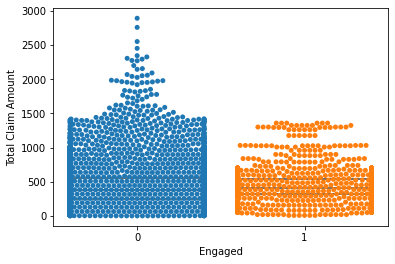

In [ ]:
#plot swarmplot
sns.swarmplot(data=ax1, x="Engaged", y="Total Claim Amount")

#plot boxplot
sns.boxplot(
    data=ax1,
    x="Engaged",
    y="Total Claim Amount",
    showcaps=False,
    whiskerprops={'linewidth':0},
    showfliers=False,
    boxprops={'facecolor':'None'}
)

Engaged(응답여부)에 따른 Income(수입)의 분포도를 보기 위한 boxplot.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


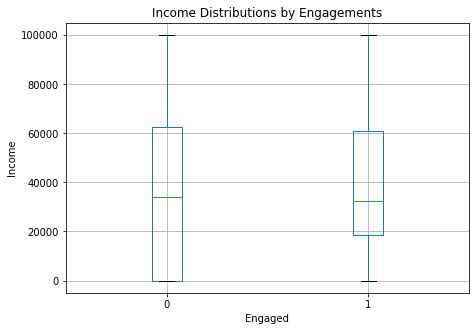

In [ ]:
ax = df[['Engaged', 'Income']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Income')
ax.set_title('Income Distributions by Engagements')

plt.suptitle("")
plt.show()

In [ ]:
df.groupby('Engaged').describe()['Income'].T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


[Logistic Regression 사용법]
https://databoom.tistory.com/entry/Logistic-Regression-%EC%84%A4%EB%AA%85%EA%B3%BC-%EC%8B%A4%EC%8A%B5

In [ ]:
from statsmodels.formula.api import logit
import statsmodels.formula.api as sm

df.describe()은 숫자(int, float, double, long 등)로 되어있는 데이터들의 column을 요약한 수치 및 통계로 보여준다. 

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [ ]:
df['Income'].dtype

dtype('int64')

In [ ]:
df['Customer Lifetime Value'].dtype

dtype('float64')

In [ ]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies',
    'Total Claim Amount'
]

In [ ]:
formula1 = 'df["Engaged"] ~ df[continuous_vars]'
lg = sm.logit(formula = formula1, data = df)

In [ ]:
df["Engaged"].count()

9134

In [ ]:
df[continuous_vars].count()

Customer Lifetime Value          9134
Income                           9134
Monthly Premium Auto             9134
Months Since Last Claim          9134
Months Since Policy Inception    9134
Number of Open Complaints        9134
Number of Policies               9134
Total Claim Amount               9134
dtype: int64

In [ ]:
logit_fit = lg.fit()

Optimization terminated successfully.
         Current function value: 0.409905
         Iterations 6


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          df["Engaged"]   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9125
Method:                           MLE   Df Model:                            8
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                0.002015
Time:                        08:55:40   Log-Likelihood:                -3744.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                   0.05685
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.7866      0.123    -14.476      0.000      -2.029      -1.545
df[continuous_vars][0] -6.327e-06   4.86e-06     -1.301      0.193   -1.59e-05     3.2e-06
df[continuous_vars][1]  2.042e-06   1.09e-06      1.869      0.062   -9.89e-08    4.18e-06
df[continuous_vars][2]    -0.0001      0.001     -0.097      0.922      -0.003       0.002
df[continuous_vars][3]    -0.0045      0.003     -1.503      0.133      -0.010       0.001
df[continuous_vars][4]     0.0002      0.001      0.198      0.843      -0.002       0.002
df[continuous_vars][5]    -0.0326      0.034     -0.964      0.335      -0.099       0.034
df[continuous_vars][6]    -0.0244      0.013     -1.904      0.057      -0.050       0.001
df[continuous_vars][7]     0.0003      0.000      1.895      0.058   -9.52e-06       0.001
==========================================================================================
"""

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [ ]:
labels

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
labels, levels = df['Education'].factorize() # https://runebook.dev/ko/docs/pandas/reference/api/pandas.factorize

In [ ]:
levels

Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')

In [ ]:
import numpy as np

In [ ]:
with np.printoptions(threshold=np.inf):
  print(labels)

[0 0 0 0 0 0 1 2 0 1 1 1 2 3 1 0 3 1 1 3 3 0 0 0 0 1 0 2 1 2 1 3 0 0 0 3 0
 2 0 3 3 1 0 3 1 4 0 3 0 3 1 0 3 0 0 1 1 3 3 2 0 0 0 3 0 1 1 3 0 1 3 2 2 0
 0 0 3 1 1 0 1 3 4 2 1 3 1 0 0 1 1 0 0 0 3 0 2 0 0 1 1 1 0 1 3 0 0 3 0 1 1
 3 1 0 3 3 3 3 0 1 1 0 3 3 0 1 2 1 1 2 3 0 0 1 3 3 3 1 1 0 1 2 3 3 3 0 1 0
 3 1 0 3 3 0 0 3 1 0 1 0 3 1 1 0 0 2 0 3 3 3 1 4 1 1 3 0 1 0 1 0 0 0 3 0 0
 3 1 0 0 1 2 3 0 0 3 0 3 0 3 1 2 0 3 1 3 1 1 1 3 0 3 1 1 3 1 1 1 3 3 1 0 0
 3 3 1 1 1 3 3 0 0 1 3 0 3 0 0 1 1 0 3 1 1 1 1 0 0 3 0 2 3 0 4 1 0 3 0 2 0
 0 0 1 1 3 0 1 2 0 1 3 2 3 3 3 0 2 1 3 1 3 1 0 3 0 0 3 0 0 3 1 0 3 2 0 3 4
 1 0 1 3 1 0 3 1 0 1 0 1 0 0 0 3 3 4 2 0 1 0 0 2 1 4 0 1 0 1 3 0 1 0 3 3 1
 3 1 3 1 0 0 1 3 3 3 3 3 0 3 2 0 1 1 1 3 2 3 3 2 3 1 4 1 0 0 0 3 0 1 1 0 2
 0 3 0 0 2 1 3 0 3 1 1 0 1 1 4 1 3 0 1 2 2 0 1 0 0 3 0 0 3 3 0 0 1 1 0 3 3
 2 3 3 1 1 2 3 1 1 0 0 1 2 1 1 3 1 3 0 2 2 3 3 1 1 1 2 0 4 1 0 3 1 1 3 1 3
 1 0 3 3 0 0 0 0 3 2 1 0 4 0 3 0 3 1 1 4 1 0 0 0 0 1 3 1 0 3 1 0 1 1 3 0 0
 3 1 1 2 1 0 1 3 2 3 1 3 

In [ ]:
levels

Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')

In [ ]:
# categorical() 메서드: https://steadiness-193.tistory.com/233

In [ ]:
categories = pd.Categorical(
    df['Education'],
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

In [ ]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [ ]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [ ]:
with np.printoptions(threshold=np.inf):
  print(categories.codes)

[1 1 1 1 1 1 2 3 1 2 2 2 3 0 2 1 0 2 2 0 0 1 1 1 1 2 1 3 2 3 2 0 1 1 1 0 1
 3 1 0 0 2 1 0 2 4 1 0 1 0 2 1 0 1 1 2 2 0 0 3 1 1 1 0 1 2 2 0 1 2 0 3 3 1
 1 1 0 2 2 1 2 0 4 3 2 0 2 1 1 2 2 1 1 1 0 1 3 1 1 2 2 2 1 2 0 1 1 0 1 2 2
 0 2 1 0 0 0 0 1 2 2 1 0 0 1 2 3 2 2 3 0 1 1 2 0 0 0 2 2 1 2 3 0 0 0 1 2 1
 0 2 1 0 0 1 1 0 2 1 2 1 0 2 2 1 1 3 1 0 0 0 2 4 2 2 0 1 2 1 2 1 1 1 0 1 1
 0 2 1 1 2 3 0 1 1 0 1 0 1 0 2 3 1 0 2 0 2 2 2 0 1 0 2 2 0 2 2 2 0 0 2 1 1
 0 0 2 2 2 0 0 1 1 2 0 1 0 1 1 2 2 1 0 2 2 2 2 1 1 0 1 3 0 1 4 2 1 0 1 3 1
 1 1 2 2 0 1 2 3 1 2 0 3 0 0 0 1 3 2 0 2 0 2 1 0 1 1 0 1 1 0 2 1 0 3 1 0 4
 2 1 2 0 2 1 0 2 1 2 1 2 1 1 1 0 0 4 3 1 2 1 1 3 2 4 1 2 1 2 0 1 2 1 0 0 2
 0 2 0 2 1 1 2 0 0 0 0 0 1 0 3 1 2 2 2 0 3 0 0 3 0 2 4 2 1 1 1 0 1 2 2 1 3
 1 0 1 1 3 2 0 1 0 2 2 1 2 2 4 2 0 1 2 3 3 1 2 1 1 0 1 1 0 0 1 1 2 2 1 0 0
 3 0 0 2 2 3 0 2 2 1 1 2 3 2 2 0 2 0 1 3 3 0 0 2 2 2 3 1 4 2 1 0 2 2 0 2 0
 2 1 0 0 1 1 1 1 0 3 2 1 4 1 0 1 0 2 2 4 2 1 1 1 1 2 0 2 1 0 2 1 2 2 0 1 1
 0 2 2 3 2 1 2 0 3 0 2 0 



---



- Pandas의 get_dummies 메서드
    
    링크: [https://devuna.tistory.com/67](https://devuna.tistory.com/67)
    
    머신러닝을 진행할 때 기계, 즉 컴퓨터가 이해할 수 있도록 모든 데이터를 수치화시키는 작업이 필요하다. 예를 들어, 숫자가 아닌 object형의 데이터가 있다면…[월, 화, 수, 목, 금] 
    
    (*참고: categorical data가 두가지, 즉 binary라면 get_dummies() 사용할 필요없음!)
    
    1) 그렇다면, 먼저 수치형 데이터로 변환을 해준 뒤,
    
    2) 수치화된 데이터를 가변수화, pd.get_dummies() 를 사용하여 나타내준다.
    
    사용하는 이유는? 수치화 시켰을 시 수치 간 관계가 생기는데, 이를 없애주기 위함! (월 + 화 = 수요일?)

In [ ]:
pd.get_dummies(df['Education']).head(10)

,Bachelor,College,Doctor,High School or Below,Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,1,0,0,0,0
9,0,1,0,0,0


In [ ]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values

In [ ]:
gender_values

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
with np.printoptions(threshold=np.inf):
  print(gender_values)

[0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 

In [ ]:
gender_labels

Index(['F', 'M'], dtype='object')

In [ ]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0,1
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1,0
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0,1
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0,1


In [ ]:
categories = pd.Categorical(
    df['Education'],
    categories=['High Scholl or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

In [ ]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [ ]:
with np.printoptions(threshold=np.inf):
  print(categories.codes)

[ 1  1  1  1  1  1  2  3  1  2  2  2  3 -1  2  1 -1  2  2 -1 -1  1  1  1
  1  2  1  3  2  3  2 -1  1  1  1 -1  1  3  1 -1 -1  2  1 -1  2  4  1 -1
  1 -1  2  1 -1  1  1  2  2 -1 -1  3  1  1  1 -1  1  2  2 -1  1  2 -1  3
  3  1  1  1 -1  2  2  1  2 -1  4  3  2 -1  2  1  1  2  2  1  1  1 -1  1
  3  1  1  2  2  2  1  2 -1  1  1 -1  1  2  2 -1  2  1 -1 -1 -1 -1  1  2
  2  1 -1 -1  1  2  3  2  2  3 -1  1  1  2 -1 -1 -1  2  2  1  2  3 -1 -1
 -1  1  2  1 -1  2  1 -1 -1  1  1 -1  2  1  2  1 -1  2  2  1  1  3  1 -1
 -1 -1  2  4  2  2 -1  1  2  1  2  1  1  1 -1  1  1 -1  2  1  1  2  3 -1
  1  1 -1  1 -1  1 -1  2  3  1 -1  2 -1  2  2  2 -1  1 -1  2  2 -1  2  2
  2 -1 -1  2  1  1 -1 -1  2  2  2 -1 -1  1  1  2 -1  1 -1  1  1  2  2  1
 -1  2  2  2  2  1  1 -1  1  3 -1  1  4  2  1 -1  1  3  1  1  1  2  2 -1
  1  2  3  1  2 -1  3 -1 -1 -1  1  3  2 -1  2 -1  2  1 -1  1  1 -1  1  1
 -1  2  1 -1  3  1 -1  4  2  1  2 -1  2  1 -1  2  1  2  1  2  1  1  1 -1
 -1  4  3  1  2  1  1  3  2  4  1  2  1  2 -1  1  2

In [ ]:
categories.categories

Index(['High Scholl or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [ ]:
df['EducationFactorized'] = categories.codes

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized,EducationFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1


In [ ]:
formula2 = "df['Engaged'] ~ df[['GenderFactorized', 'EducationFactorized']]"
logit = sm.logit(formula = formula2, data = df)

In [ ]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.410185
         Iterations 6


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          df['Engaged']   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9131
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                0.001333
Time:                        08:55:40   Log-Likelihood:                -3746.6
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                  0.006725
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.8693      0.048    -39.116      0.000      -1.963      -1.776
df[['GenderFactorized', 'EducationFactorized']][0]     0.0260      0.060      0.434      0.664      -0.091       0.143
df[['GenderFactorized', 'EducationFactorized']][1]     0.0648      0.021      3.128      0.002       0.024       0.105
======================================================================================================================
"""

In [ ]:
formula3 = "df['Engaged'] ~ df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']]"
logit = sm.logit(formula = formula3, data = df)

In [ ]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.409270
         Iterations 6


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          df['Engaged']   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                0.003561
Time:                        08:55:41   Log-Likelihood:                -3738.3
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                  0.002881
========================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                                                                                                               -1.8672      0.128    -14.535      0.000      -2.119      -1.615
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']][0] -6.027e-06   4.87e-06     -1.238      0.216   -1.56e-05    3.52e-06
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']][1]  2.056e-06   1.09e-06      1.880      0.060   -8.71e-08     4.2e-06
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']][2]    -0.0005      0.001     -0.365      0.715      -0.003       0.002
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']][3]    -0.0047      0.003     -1.565      0.118      -0.011       0.001
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']][4]     0.0002      0.001      0.167      0.867      -0.002       0.002
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']][5]    -0.0348      0.034     -1.030      0.303      -0.101       0.031
df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Polic